In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [5]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\Uday\Amazon\Reviews.csv")


In [12]:
con = sqlite3.connect(r'C:\Users\DELL\Desktop\Uday\Amazon\database.sqlite')

In [14]:
type(con)

sqlite3.Connection

# reading data from Sqlite database

In [16]:
df = pd.read_sql_query('SELECT *FROM REVIEWS',con)

In [18]:
df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [20]:
df_valid= df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]

# Data Preparation
# Doing cleaning/Data wrangling(remove invalid rows , remove duplicate rows) & convert "time" feature data-type to date-time

In [22]:
df_valid.duplicated(['UserId','ProfileName','Time','Text'])

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [24]:
data = df_valid.drop_duplicates(subset=['UserId', 'ProfileName', 'Time', 'Text'])
print(data)

            Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominato

In [26]:
data['Time'] = pd.to_datetime(df['Time'], unit='s')


C:\Users\DELL\AppData\Local\Temp\ipykernel_13568\3247673427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'] = pd.to_datetime(df['Time'], unit='s')


In [28]:
data['Time']


0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Time, Length: 393931, dtype: datetime64[ns]

In [30]:
# Group by 'UserId' and aggregate the required fields
recommend_df = data.groupby(['UserId']).agg({
    'Summary': 'count',      # Count the number of summaries
    'Text': 'count',         # Count the number of texts
    'Score': 'mean',         # Calculate the average score
    'ProductId': 'count'     # Count the number of products reviewed
}).sort_values('ProductId', ascending=False).head(10)

# Display the result
print(recommend_df)


                Summary  Text     Score  ProductId
UserId                                            
AY12DBB0U420B       329   329  4.659574        329
A3OXHLG6DIBRW8      278   278  4.546763        278
A281NPSIMI1C2R      259   259  4.787645        259
A1YUL9PCJR3JTY      214   214  4.621495        214
A1Z54EM24Y40LL      211   211  4.383886        211
A2MUGFV2TDQ47K      161   161  3.826087        161
A3D6OI36USYOU1      146   146  4.417808        146
AZV26LP92E6WU       129   129  4.852713        129
AKMEY1BSHSDG7       119   119  4.747899        119
A2GEZJHBV92EVR      118   118  4.542373        118


In [32]:
recommend_df.columns=['Number_of_summaries', 'num_text', 'avg_score', 'No_of_prods_purchased']


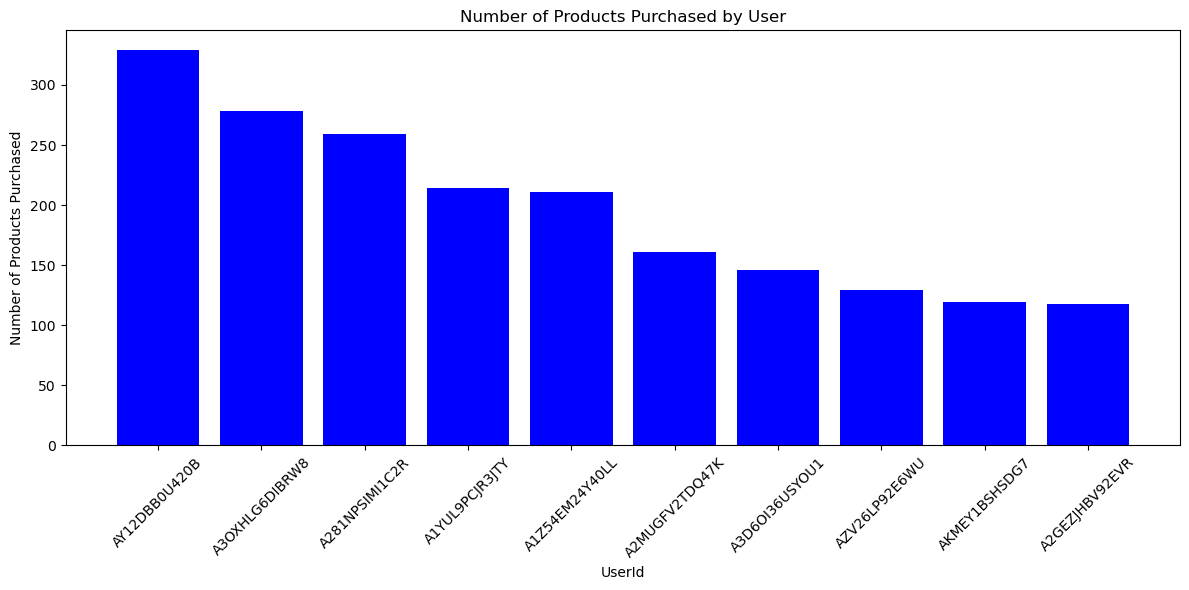

In [34]:
import matplotlib.pyplot as plt

# Sort the DataFrame
recommend_df_sorted = recommend_df.sort_values(by='No_of_prods_purchased', ascending=False)

# Create a bar plot using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(recommend_df_sorted.index, recommend_df_sorted['No_of_prods_purchased'], color='blue')

# Add labels and title
plt.xlabel('UserId')
plt.ylabel('Number of Products Purchased')
plt.title('Number of Products Purchased by User')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()


In [60]:
prod_count = data['ProductId'].value_counts().to_frame()
print(prod_count)

            count
ProductId        
B007JFMH8M    912
B002QWP89S    630
B003B3OOPA    622
B001EO5Q64    566
B0013NUGDE    558
...           ...
B002DNX4GO      1
B000FM2YU2      1
B001M1VA32      1
B009858H6M      1
B001LR2CU2      1

[67624 rows x 1 columns]


In [66]:
prod_count

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1


In [76]:
prod_count['count']>500

ProductId
B007JFMH8M     True
B002QWP89S     True
B003B3OOPA     True
B001EO5Q64     True
B0013NUGDE     True
              ...  
B002DNX4GO    False
B000FM2YU2    False
B001M1VA32    False
B009858H6M    False
B001LR2CU2    False
Name: count, Length: 67624, dtype: bool

In [78]:
prod_count[prod_count['count']>500]

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541


In [88]:
frequent_ids = prod_count[prod_count['count']>500].index

# which product has good number of reviews? 

In [84]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [96]:
fre_pro_df= data[data['ProductId'].isin(frequent_ids)]

<Axes: xlabel='count', ylabel='ProductId'>

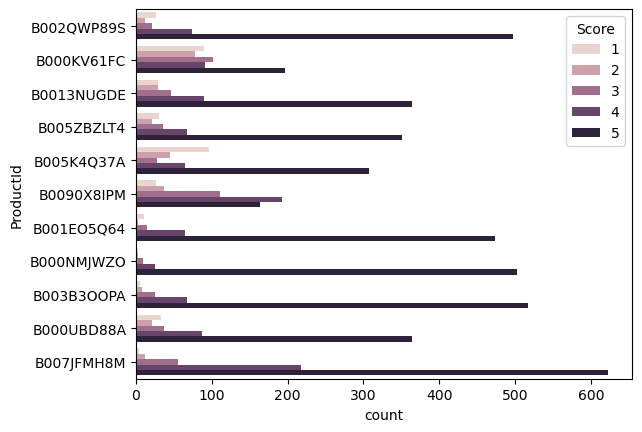

In [104]:
sns.countplot(y='ProductId', data=fre_pro_df, hue='Score' )

In [106]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [118]:
x= data['UserId'].value_counts()

In [122]:
x

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
AAQPR1MSRXKTU       1
AGO81Z6PZSF7P       1
ALA84XWMTQBFT       1
A1G9DK8EUR36JC      1
A3LGQPJCZVL9UC      1
Name: count, Length: 256059, dtype: int64

In [116]:
data.head(7)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,2012-07-12,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,2012-06-20,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...


In [139]:
data['viewer_type'] = data['UserId'].apply(lambda user : "Frequent" if x[user]>50 else "Not Frequent")

C:\Users\DELL\AppData\Local\Temp\ipykernel_13568\2452722826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['viewer_type'] = data['UserId'].apply(lambda user : "Frequent" if x[user]>50 else "Not Frequent")


In [141]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'viewer_type'],
      dtype='object')

In [143]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent


In [153]:
data['viewer_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [155]:
data['viewer_type'].unique

<bound method Series.unique of 0         Not Frequent
1         Not Frequent
2         Not Frequent
3         Not Frequent
4         Not Frequent
              ...     
568449    Not Frequent
568450    Not Frequent
568451    Not Frequent
568452    Not Frequent
568453    Not Frequent
Name: viewer_type, Length: 393931, dtype: object>

In [171]:
 not_fre_df = data[data['viewer_type'] == 'Not Frequent']
 fre_df = data[data['viewer_type'] == 'Frequent']

<Axes: xlabel='Score'>

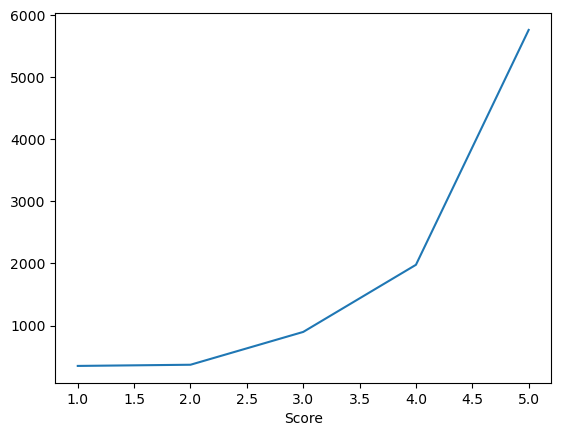

In [183]:
fre_df['Score'].value_counts().plot()

<Axes: xlabel='Score'>

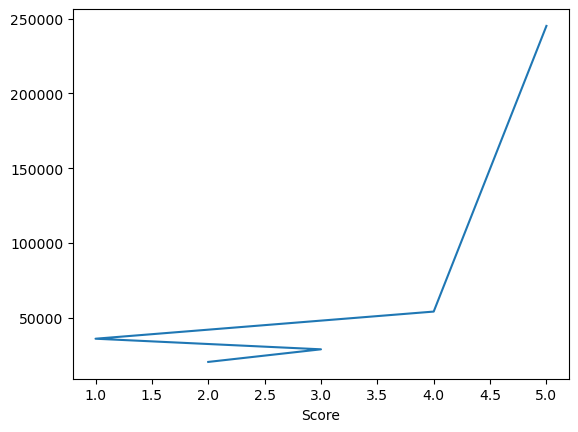

In [185]:
not_fre_df['Score'].value_counts().plot()

In [ ]:
not significant diffrence between 2 charts fre, nfreq

In [187]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'viewer_type'],
      dtype='object')

In [191]:
data['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 393931, dtype: object

In [199]:
data[['UserId', 'Text']]


,UserId,Text
0,A3SGXH7AUHU8GW,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,This is a confection that has been around a fe...
3,A395BORC6FGVXV,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,Great taffy at a great price. There was a wid...
...,...,...
568449,A28KG5XORO54AY,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,These are the BEST treats for training and rew...


In [221]:
data['Text'][0]

"One of my boys needed to lose some weight and the other didn't.  I put this food on the floor for the chubby guy, and the protein-rich, no by-product food up higher where only my skinny boy can jump.  The higher food sits going stale.  They both really go for this food.  And my chubby boy has been losing about an ounce a week."

In [211]:
type(data['Text'][0])

str

In [229]:
type(data['Text'][0].split(' '))

list

In [233]:
len(data['Text'][0].split(' '))

49

In [239]:
data['word_count'] = data['Text'].apply(lambda text: len(text.split()))
print(data[['Text', 'word_count']])


                                                     Text  word_count
0       I have bought several of the Vitality canned d...          48
1       Product arrived labeled as Jumbo Salted Peanut...          31
2       This is a confection that has been around a fe...          94
3       If you are looking for the secret ingredient i...          41
4       Great taffy at a great price.  There was a wid...          27
...                                                   ...         ...
568449  Great for sesame chicken..this is a good if no...          26
568450  I'm disappointed with the flavor. The chocolat...          46
568451  These stars are small, so you can give 10-15 o...          66
568452  These are the BEST treats for training and rew...          35
568453  I am very satisfied ,product is as advertised,...          21

[393931 rows x 2 columns]


C:\Users\DELL\AppData\Local\Temp\ipykernel_13568\331537133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['word_count'] = data['Text'].apply(lambda text: len(text.split()))


In [241]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text Length,word_count
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,4,48
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,4,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,4,94
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,4,41
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,4,27


# Are frequent users more verbose? 

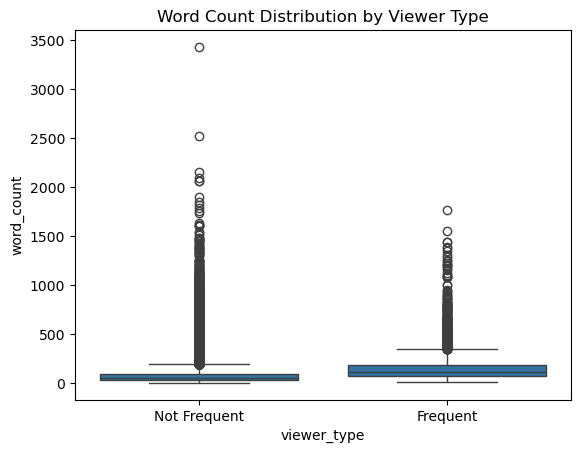

In [243]:
sns.boxplot(x='viewer_type', y='word_count', data=data)

# Step 3: Display the plot
plt.title('Word Count Distribution by Viewer Type')
plt.show()

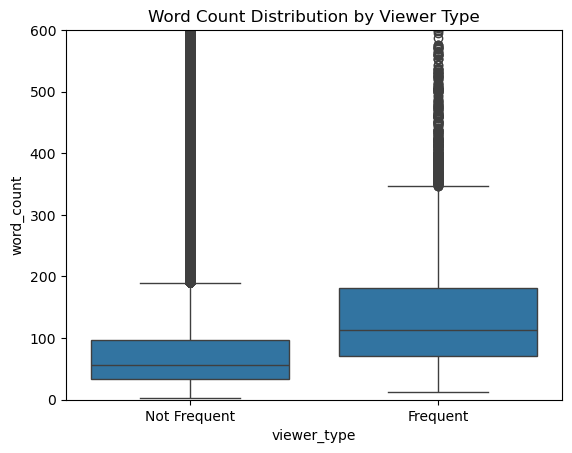

In [245]:
sns.boxplot(x='viewer_type', y='word_count', data=data)

# Step 3: Limit the y-axis to a maximum of 600 words
plt.ylim(0, 600)

# Step 4: Display the plot
plt.title('Word Count Distribution by Viewer Type')
plt.show()

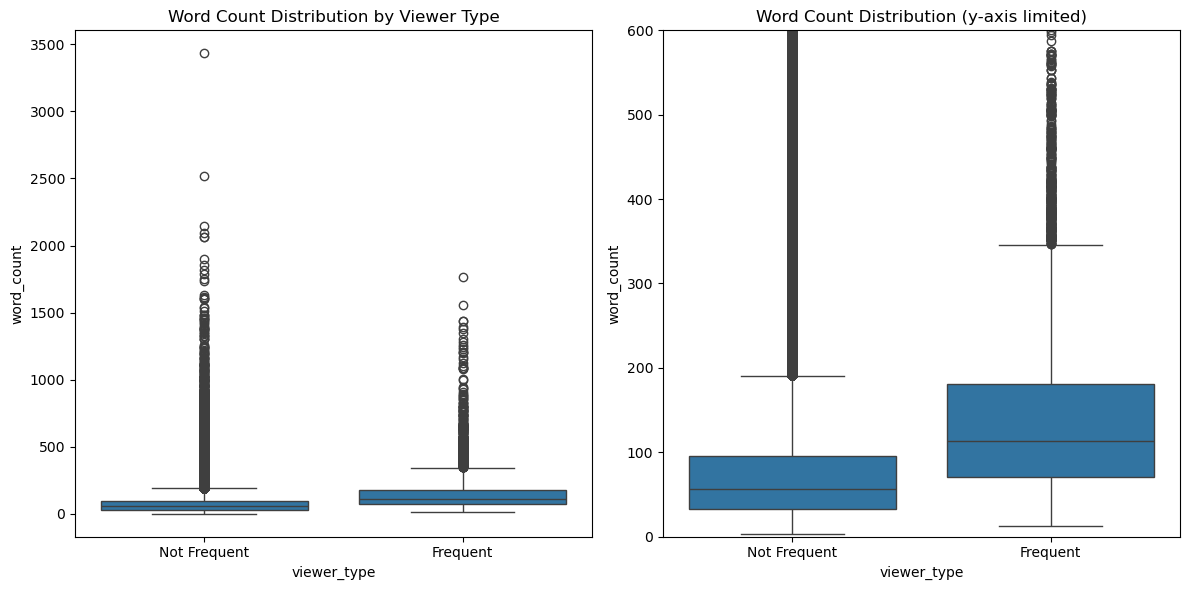

In [247]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns, figsize sets the size of the whole figure

# Step 3: First box plot (Word Count by Viewer Type)
sns.boxplot(x='viewer_type', y='word_count', data=data, ax=axs[0])
axs[0].set_title('Word Count Distribution by Viewer Type')

# Step 4: Second box plot (Word Count Distribution by Viewer Type, limiting y-axis)
sns.boxplot(x='viewer_type', y='word_count', data=data, ax=axs[1])
axs[1].set_title('Word Count Distribution (y-axis limited)')

# Step 5: Limit the y-axis of the second plot to 600 words
axs[1].set_ylim(0, 600)

# Step 6: Display the plots
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [ ]:
'''Conclusion: 

The distributions of word counts for frequent and infrequent reviews shows that 
infrequent reviewers have a large amount of reviews of low word count.
On the other hand, the largest concentration of word count is higher for frequent reviewers than for infrequent reviews.''' 


# sentient analysis

In [261]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [271]:
from textblob import TextBlob
import pandas as pd

# Function to analyze sentiment using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Handle the potential exception by using try-except
try:
    # Apply the function to the 'Summary' column (with .loc to avoid SettingWithCopyWarning)
    data.loc[:, ['polarity', 'subjectivity']] = data['Summary'].apply(lambda x: pd.Series(analyze_sentiment(x)))

    # Display the result
    print(data[['Summary', 'polarity', 'subjectivity']])

except KeyError as e:
    print(f"KeyError: {e}. Please check if the 'Summary' column exists in your DataFrame.")
except Exception as e:
    print(f"An error occurred: {e}")


                        Summary  polarity  subjectivity
0          I love this product!       NaN           NaN
1              This is terrible       NaN           NaN
2            Best purchase ever       NaN           NaN
3  Not bad, but could be better       NaN           NaN
4           Horrible experience       NaN           NaN


In [273]:
from textblob import TextBlob

# Test on a single summary to check if TextBlob works
sample_text = "I love this product!"
blob = TextBlob(sample_text)

# Check polarity and subjectivity
print("Polarity:", blob.sentiment.polarity)
print("Subjectivity:", blob.sentiment.subjectivity)


Polarity: 0.625
Subjectivity: 0.6


In [275]:
import pandas as pd
from textblob import TextBlob

# Function to analyze sentiment using TextBlob
def analyze_sentiment(text):
    if pd.isna(text) or text == '':  # Check if the text is empty or NaN
        return None, None  # If so, return None for both polarity and subjectivity
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the function to the 'Summary' column
data[['polarity', 'subjectivity']] = data['Summary'].apply(lambda x: pd.Series(analyze_sentiment(x)))

# Display the result
print(data[['Summary', 'polarity', 'subjectivity']])


                        Summary  polarity  subjectivity
0          I love this product!     0.625      0.600000
1              This is terrible    -1.000      1.000000
2            Best purchase ever     1.000      0.300000
3  Not bad, but could be better     0.425      0.583333
4           Horrible experience    -1.000      1.000000


In [279]:
data['Summary']

0            I love this product!
1                This is terrible
2              Best purchase ever
3    Not bad, but could be better
4             Horrible experience
Name: Summary, dtype: object

In [285]:
data.columns

Index(['Summary', 'Text', 'polarity', 'subjectivity'], dtype='object')

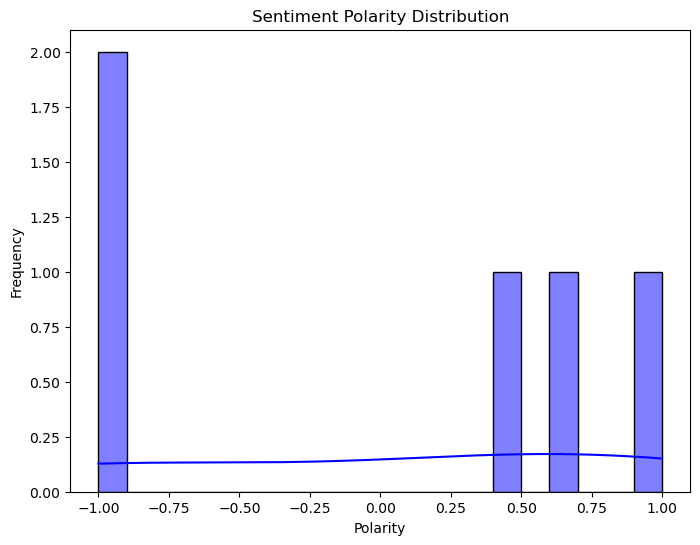

In [287]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

# Function to analyze sentiment using TextBlob
def analyze_sentiment(text):
    if pd.isna(text) or text == '':  # Check if the text is empty or NaN
        return None, None  # If so, return None for both polarity and subjectivity
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the function to the 'Summary' column
data[['polarity', 'subjectivity']] = data['Summary'].apply(lambda x: pd.Series(analyze_sentiment(x)))

# Plotting the sentiment polarity distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['polarity'], bins=20, kde=True, color='blue')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()


In [291]:
!pip install wordcloud


Most common words in negative reviews:
[('This', 1), ('is', 1), ('terrible', 1), ('Horrible', 1), ('experience', 1)]

Most common words in positive reviews:
[('I', 1), ('love', 1), ('this', 1), ('product!', 1), ('Best', 1), ('purchase', 1), ('ever', 1), ('Not', 1), ('bad,', 1), ('but', 1)]


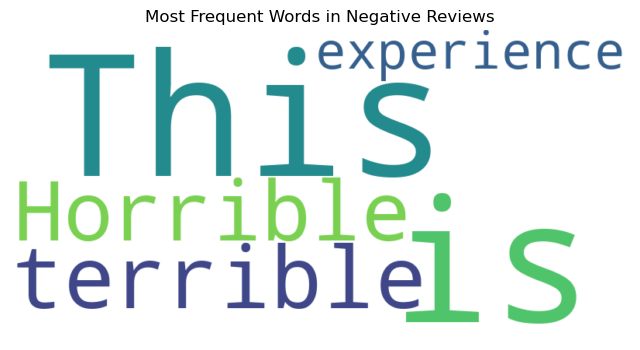

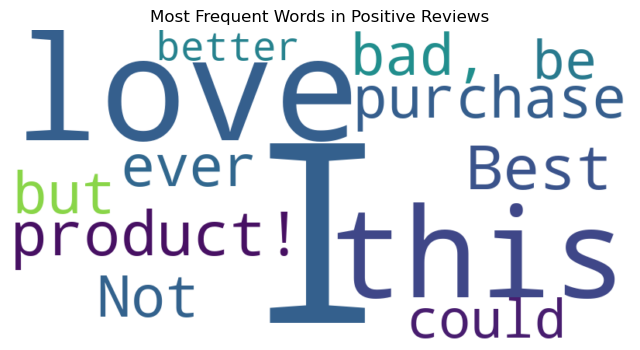

In [293]:
import pandas as pd
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Step 1: Calculate polarity for each summary
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to get the sentiment polarity
data['polarity'] = data['Summary'].apply(analyze_sentiment)

# Step 2: Filter data for negative and positive sentiments
negative_data = data[data['polarity'] < 0]
positive_data = data[data['polarity'] > 0]

# Step 3: Tokenize the text and count word frequencies
def get_word_frequencies(texts):
    words = []
    for text in texts:
        words.extend(text.split())  # Tokenize by space
    word_freq = Counter(words)  # Count the frequency of each word
    return word_freq

# Get word frequencies for negative and positive sentiment groups
negative_word_freq = get_word_frequencies(negative_data['Summary'])
positive_word_freq = get_word_frequencies(positive_data['Summary'])

# Step 4: Display the most common words in negative and positive reviews
print("Most common words in negative reviews:")
print(negative_word_freq.most_common(10))  # Top 10 most common words

print("\nMost common words in positive reviews:")
print(positive_word_freq.most_common(10))  # Top 10 most common words

# OPTIONAL: Plot WordClouds for a better visualization
# Negative words word cloud
negative_wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(negative_word_freq)
plt.figure(figsize=(8, 6))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most Frequent Words in Negative Reviews')
plt.show()

# Positive words word cloud
positive_wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(positive_word_freq)
plt.figure(figsize=(8, 6))
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most Frequent Words in Positive Reviews')
plt.show()
